# Readme

This is a simplified explanation of what a boost converter is for people without a bachelor of Electrical Engineering knowledge. What a Boost converter does is it boost up the input voltage while boost down the input current, since power in= power out. It does this by controlling the electronic switch(S). 

# How it works

When the switch is closed a large current _I_ flows through the inductor(L) and switch(S) causing the inductor to start storing magnetic field $\frac{1}{2}LI^{2}$     . The moment that the switch opens the current flowing through the inductor will decrease since a load is now limiting the current. This change doesn't happen instantaneously due to the fact that the inductor has some "current delay". As the current decreases the stored magnetic field will collapse, this causes the stored magnetic field energy to be released. Now that the inductor is releasing energy it can be seen as an additional voltage source in series to the input voltage source. So during the period that the switch is open both the input voltage source and the collapsed voltage produced by the inductor goes to the output an the collapsed voltage is larger than the input voltage. These voltages are then stored at the capacitor(C).  

When the switch is open the voltage at the output is equal to the voltage over the capacitor, when the switch is closed the capacitor slowly discharges since it has a "voltage delay". This causes the voltage at the output to slowly decrease until the switch is open again. The switch is opening and closing at super fast rate>100 kHz so the sudden switching in output voltage is not noticed and instead the average voltage will be noticed at the output.

Now for the final component the diode (D). The diode can be seen as a wire that allows current to flow in the direction of the arrow. When the switch is open the voltage over the cap is larger than the voltage of the input source, so the capacitor will try to discharge the current towards the input voltage. To stop this the diode make sure that current can't flow back into the input source and instead goes to the output.

As for the output current, only when the switch is open current goes to the output, when the switch is closed it flows back into the battery. So the output current will be less than the input current.

# Schematic and operation of boost converter
![](Images/Boost_converter_schematics.jpg)

## continuous conduction mode (CCM),Boundary condition mode (BCM) and Discontinuous conduction mode (DCM)
As mentioned before the current through the inductor will be rising when the switch is closed and discharging when the switch is open. If the current rises and discharges above $0 A$ it is in CCM. If it rises and discharges at $0 A$ it is in BCM. Current can't go below $0 A$ for the system so instead in the BCM it will first discharge to $0 A$ and stays $0 A$ until it starts rising again. 

## Operation mode of boost converter in CCM, BCM
![](Images/Boost_converter.gif)<br />
Websimulation link:
http://www.falstad.com/circuit/circuitjs.html?ctz=CQAgjCAMB0l3BWK0BMLIHZNgBxgQGyQFYAsBICkll1CApgLRhgBQAZiOjuAJwpdCfAQGYBYaEhiQUrAErDwpUkpVhlUTaTqbqMBKwDugimAwUUQ9SsisANousnVmiNLC8MKFqTRYMOHAiPLYAJs5OYtROAqH07ACGAK52AC5GIFHOlhZCtsY52ULcUKwA5kW5Fl66rABOIMo8Tk3O0fAZrYVZhfmZ6C6tTrYA8o2kzRqkvKYabqwAblyQPIUlHgLU4vA0UsgGBSuVbazovP3RGj15yPCQELywVHB4ARgiBB+39+CnmI5zfggGaNEAANQAlgA7P4YcaTFStEEqMEAeyS6VR4AENkoYio4D00DcXGxmVYWJYoK2kAmOKJEEZrGCZIAYhA9mA4CBmCAACIYgCeAB0AM4AYUFAGM7PRWEA

### On stage
![](Images/Boost_converter_ON_mode.jpg)
### Off stage
![](Images/Boost_converter_OFF_mode.jpg)

## Operation mode of boost converter in DCM
![](Images/Boost_converter_DCM.gif)
http://www.falstad.com/circuit/circuitjs.html?ctz=CQAgjCAMB0l3BWKsEA4wHYvoCwCZIBOVSVHEBSCiqhAUwFowwAoAMxANXEL04QBsPPgGY+YaEhiQ8LAErDwOcmGVLyVKjlpRdMBCwDu-IZiF5B6qCwA2i1eQum1m2KRA5ohSAMIjIgj4CYKgYAozckCwAJiZWYlQOnCDRdGwAhgCuNgAuRiAJcU5xUcbF5ZZc1gDmRZWVGHyaLABOHjjcScrcxYnw+d1xhb35hV0dVlEA8u2dajiEzirWAG6c7uXuYLy64vDUUsgGZRv15pZRBIQFBPG3vcjwcIQvr2-v1yFeGGB4IqiLTDoRqPSAQVgEDD2NTbPiLDwgABqAEsAHYsSGzKyDeHkREAe0yeXx4D4GgoYko4FcECo4lELBJzARdMgHT4txg4PAjIKLI8RChYFcjmSIgKLH+pJAADEIIdhVQmCAACJEgCeAB0AM4AYXVAGMbHQWEA
### On stage
![](Images/Boost_converter_ON_mode.jpg)
### △1 stage
![](Images/Boost_converter_OFF_mode.jpg)
### Zero stage
<img src="Images/Boost_converter_Zero_mode.jpg" width=1800 >

# Simple math and simulations explaining how it is possible that $V_{out}>V_{in}$

# Mathematics for boost converter
All graphs made in this section are made using the code found in [Code](Code)

## CCM

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Inductor
General equation for inductor $I_L=\frac{1}{L}\int_{t_2}^{t_1} V_L \,dt$  <br />
When S is closed $V_L=V_{in}$    <br />
When S is open $V_L=V_{in}-V_{out}$   <br />

In [4]:
# Parameters
F_s = float(8.0e04)   # Hz
V_out = int(150)   # V
V_in = int(45)   # V
Load = int(400)    # Ohm
Delta_I_Ratio = float(0.4)

D = 1 - V_in / V_out
I_out = V_out / Load  # A
I_in = V_out * I_out / V_in  # A
I_ripple = Delta_I_Ratio * I_in  # A
Vd = 0.6  # V

In [5]:
# Sampling
S = 1000  # Sampling resolution
N = 4  # Number of signals, needs to be an even number
Ts = 1 / F_s  # s
X = np.arange(0, N * Ts, N * Ts / S)

In [20]:
V_l = []
for i in range(N):
    Intermediate1 = np.array(np.ones(len(np.arange(0, D * Ts, N * Ts / S))) * V_in)
    V_l.extend(Intermediate1)
    Intermediate2 = np.array(np.ones(len(np.arange(Ts / S, (1 - D) * Ts, N * Ts / S))) * (V_in - V_out))
    V_l.extend(Intermediate2)

    
I_l = np.add(I_d, I_sw)    

Text(0.5, 0.98, 'Inductor')

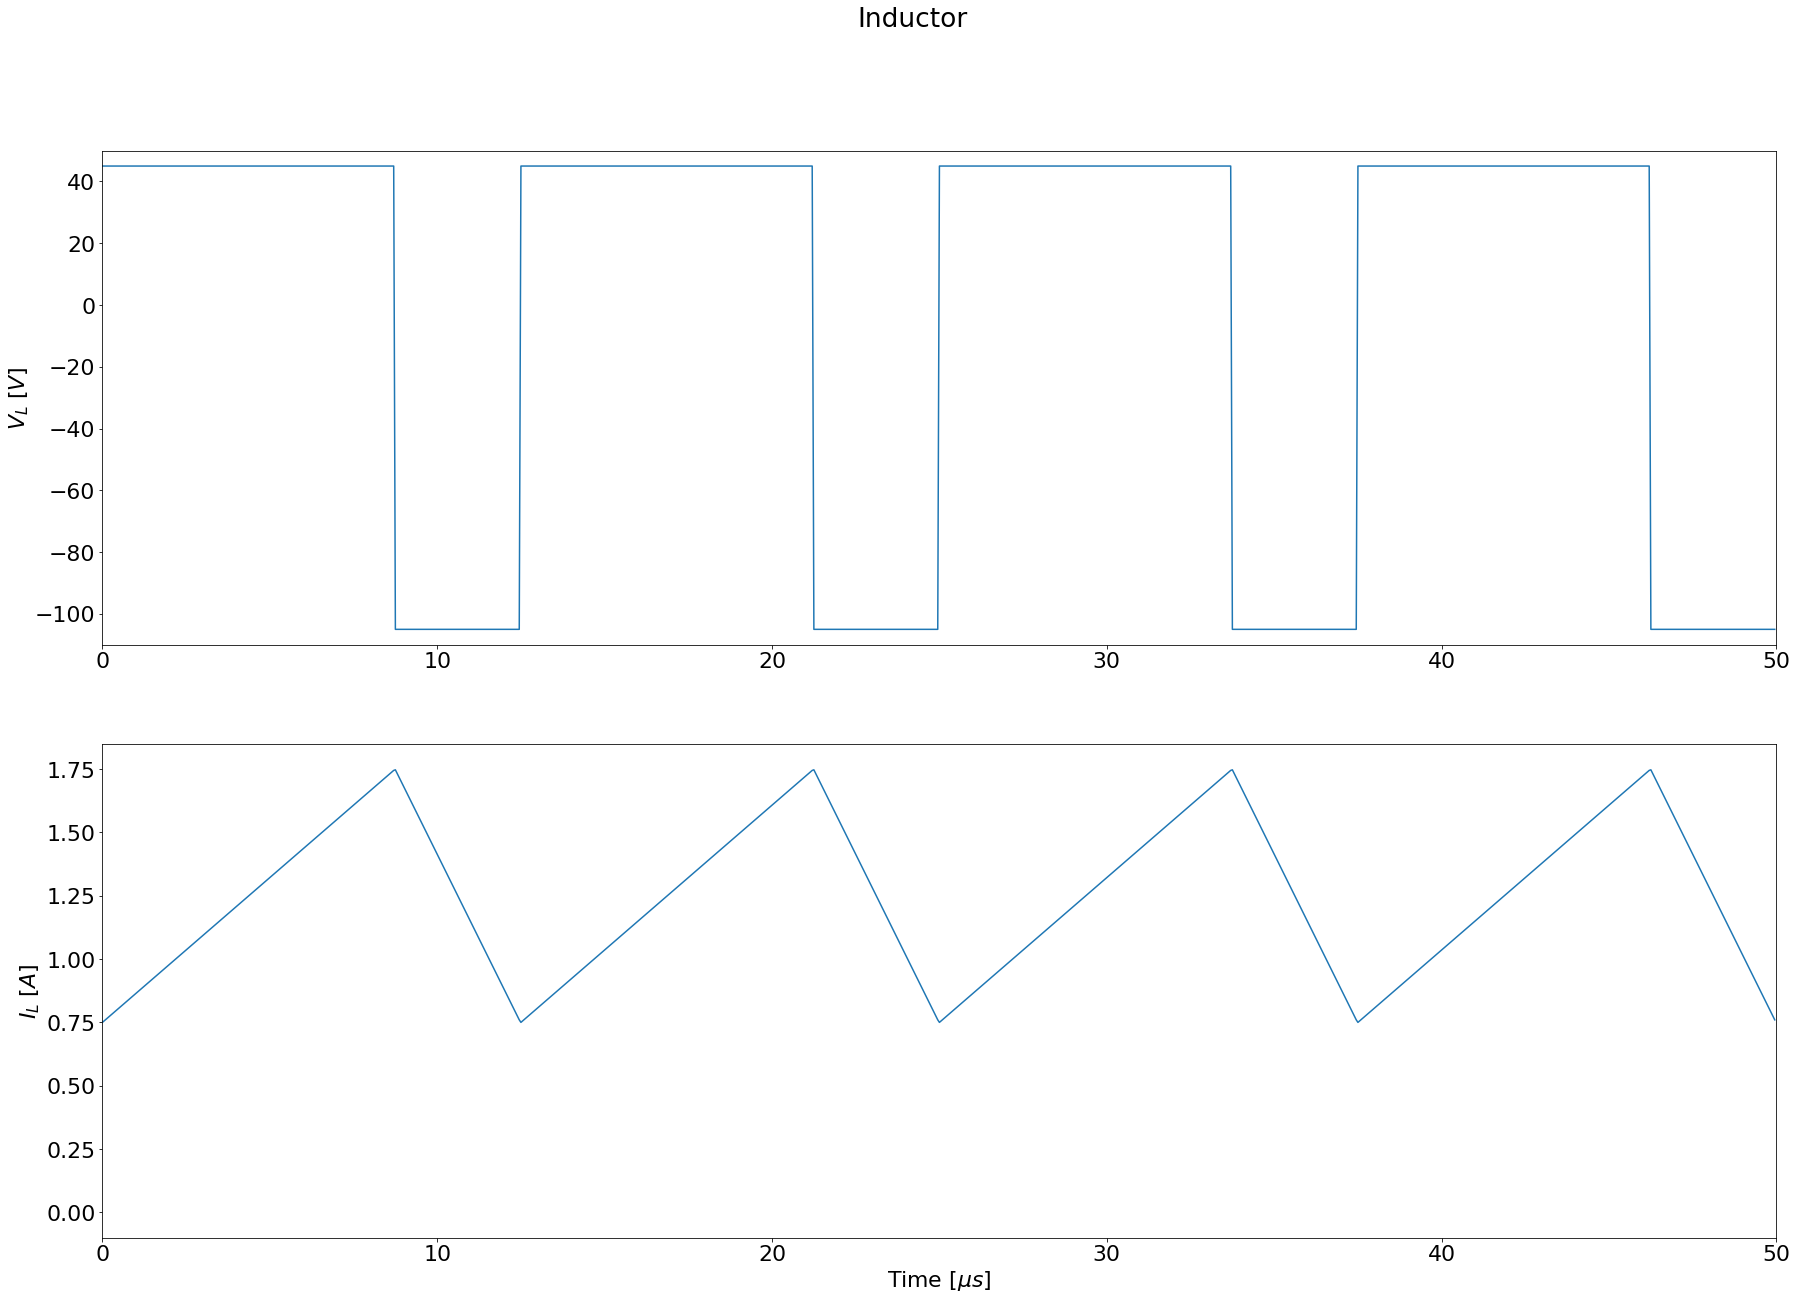

In [21]:
plt.figure(3)
plt.rcParams['figure.figsize'] = [30, 20]
plt.rcParams.update({'font.size': 22})
plt.subplot(211)
plt.plot(1e6 * X, V_l)
plt.xlim([0, N * 1e6 * Ts])
plt.ylim([V_in - V_out - 5, V_in + 5])
# plt.xlabel('Time [$\mu s$]')
plt.ylabel('$V_L$ [$V$]')

plt.subplot(212)
plt.plot(1e6 * X, I_l)
plt.xlim([0, N * 1e6 * Ts])
plt.ylim([-0.1, (I_in + I_ripple) + 0.1])
plt.xlabel('Time [$\mu s$]')
plt.ylabel('$I_{L}$ [$A$]')
plt.suptitle('Inductor')

### Transistor
When S is closed $V_{S}=0$  and $I_{S}=I_L$ <br />
When S is open $V_{S}=V_{out}$  and $I_{S}=0$


In [7]:
V_sw = []
for i in range(N):
        Intermediate1 = np.array(np.ones(len(np.arange(0, D * Ts, N * Ts / S))) * 0)
        V_sw.extend(Intermediate1)
        Intermediate2 = np.array(np.ones(len(np.arange(Ts / S, (1 - D) * Ts, N * Ts / S))) * (V_out + Vd))
        V_sw.extend(Intermediate2)

I_sw = []
for i in range(N):
        I_intermediate1 = np.array(I_in - I_ripple + (np.arange(0, D * Ts, N * Ts / S)) * 2 * I_ripple / (D * Ts))
        I_sw.extend(I_intermediate1)
        I_intermediate2 = np.array(np.ones(len(np.arange(Ts / S, (1 - D) * Ts, N * Ts / S))) * 0)
        I_sw.extend(I_intermediate2)

Text(0.5, 0.98, 'Transistor')

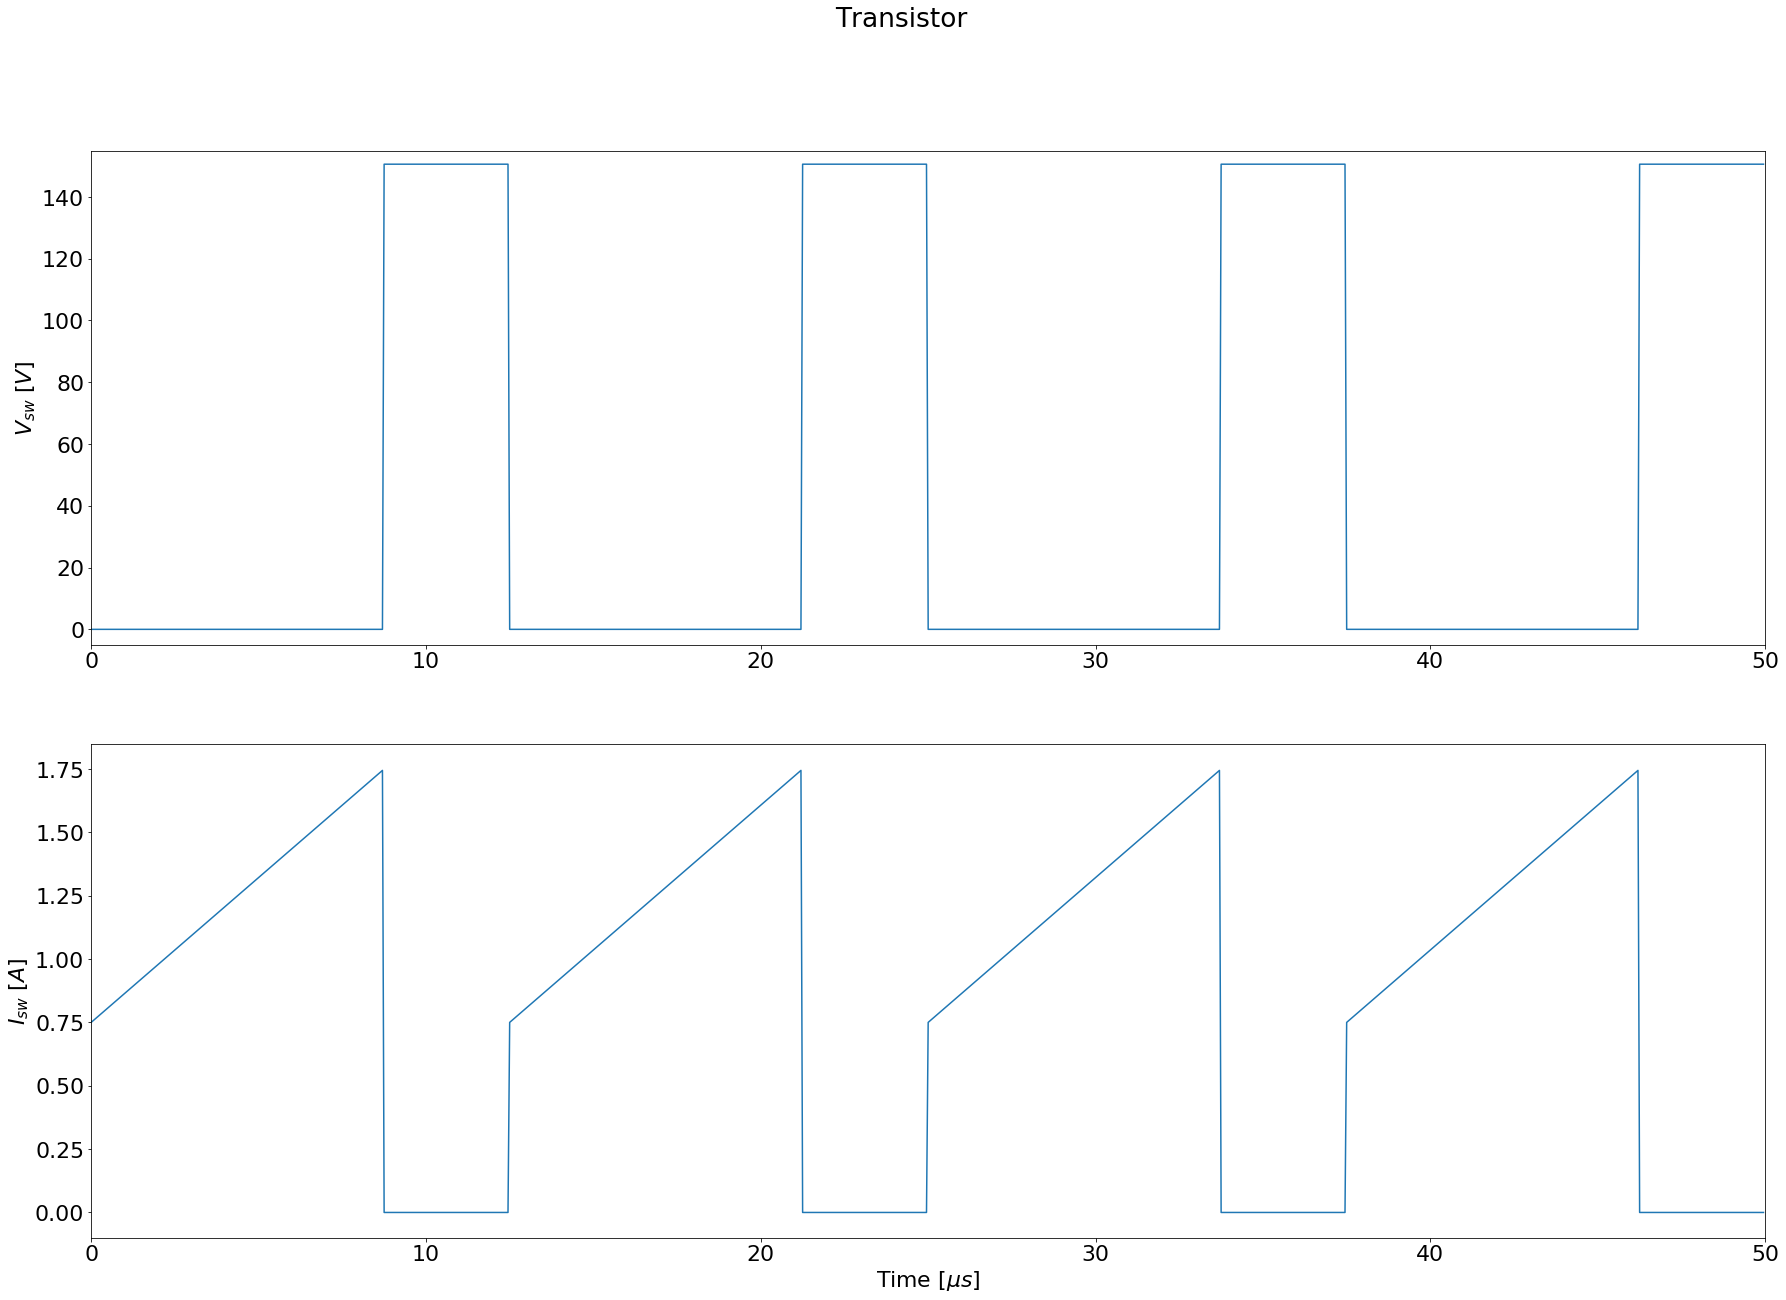

In [16]:
plt.figure(1)
plt.rcParams['figure.figsize'] = [30, 20]
plt.rcParams.update({'font.size': 22})
plt.subplot(211)
plt.plot(1e6 * X, V_sw)
plt.xlim([0, N * 1e6 * Ts])
plt.ylim([-5, V_out + 5])
# plt.xlabel('Time [$\mu s$]')
plt.ylabel('$V_{sw}$ [$V$]')

plt.subplot(212)
plt.plot(1e6 * X, I_sw)
plt.xlim([0, N * 1e6 * Ts])
plt.ylim([-0.1, (I_in + I_ripple) + 0.1])
plt.xlabel('Time [$\mu s$]')
plt.ylabel('$I_{sw}$ [$A$]')
plt.suptitle('Transistor')

### Diode
When S is closed $V_{D}=V_{out}$ and $I_{D}=0$ <br />
When S is open $V_{D}=V_{forward-drop}$ and $I_{D}=I_L$ 

In [18]:
V_d = []
for i in range(N):
    Intermediate1 = np.array(np.ones(len(np.arange(0, D * Ts, N * Ts / S))) * -V_out)
    V_d.extend(Intermediate1)
    Intermediate2 = np.array(np.ones(len(np.arange(Ts / S, (1 - D) * Ts, N * Ts / S))) * (Vd))
    V_d.extend(Intermediate2)

I_d = []
for i in range(N):
    I_intermediate1 = np.array(np.arange(0, D * Ts, N * Ts / S) * 0)
    I_d.extend(I_intermediate1)
    I_intermediate2 = np.array(I_in + I_ripple - (np.arange(Ts / S, (1 - D) * Ts, N * Ts / S)) * 2 * I_ripple / ((1 - D) * Ts))
    I_d.extend(I_intermediate2)

Text(0.5, 0.98, 'Diode')

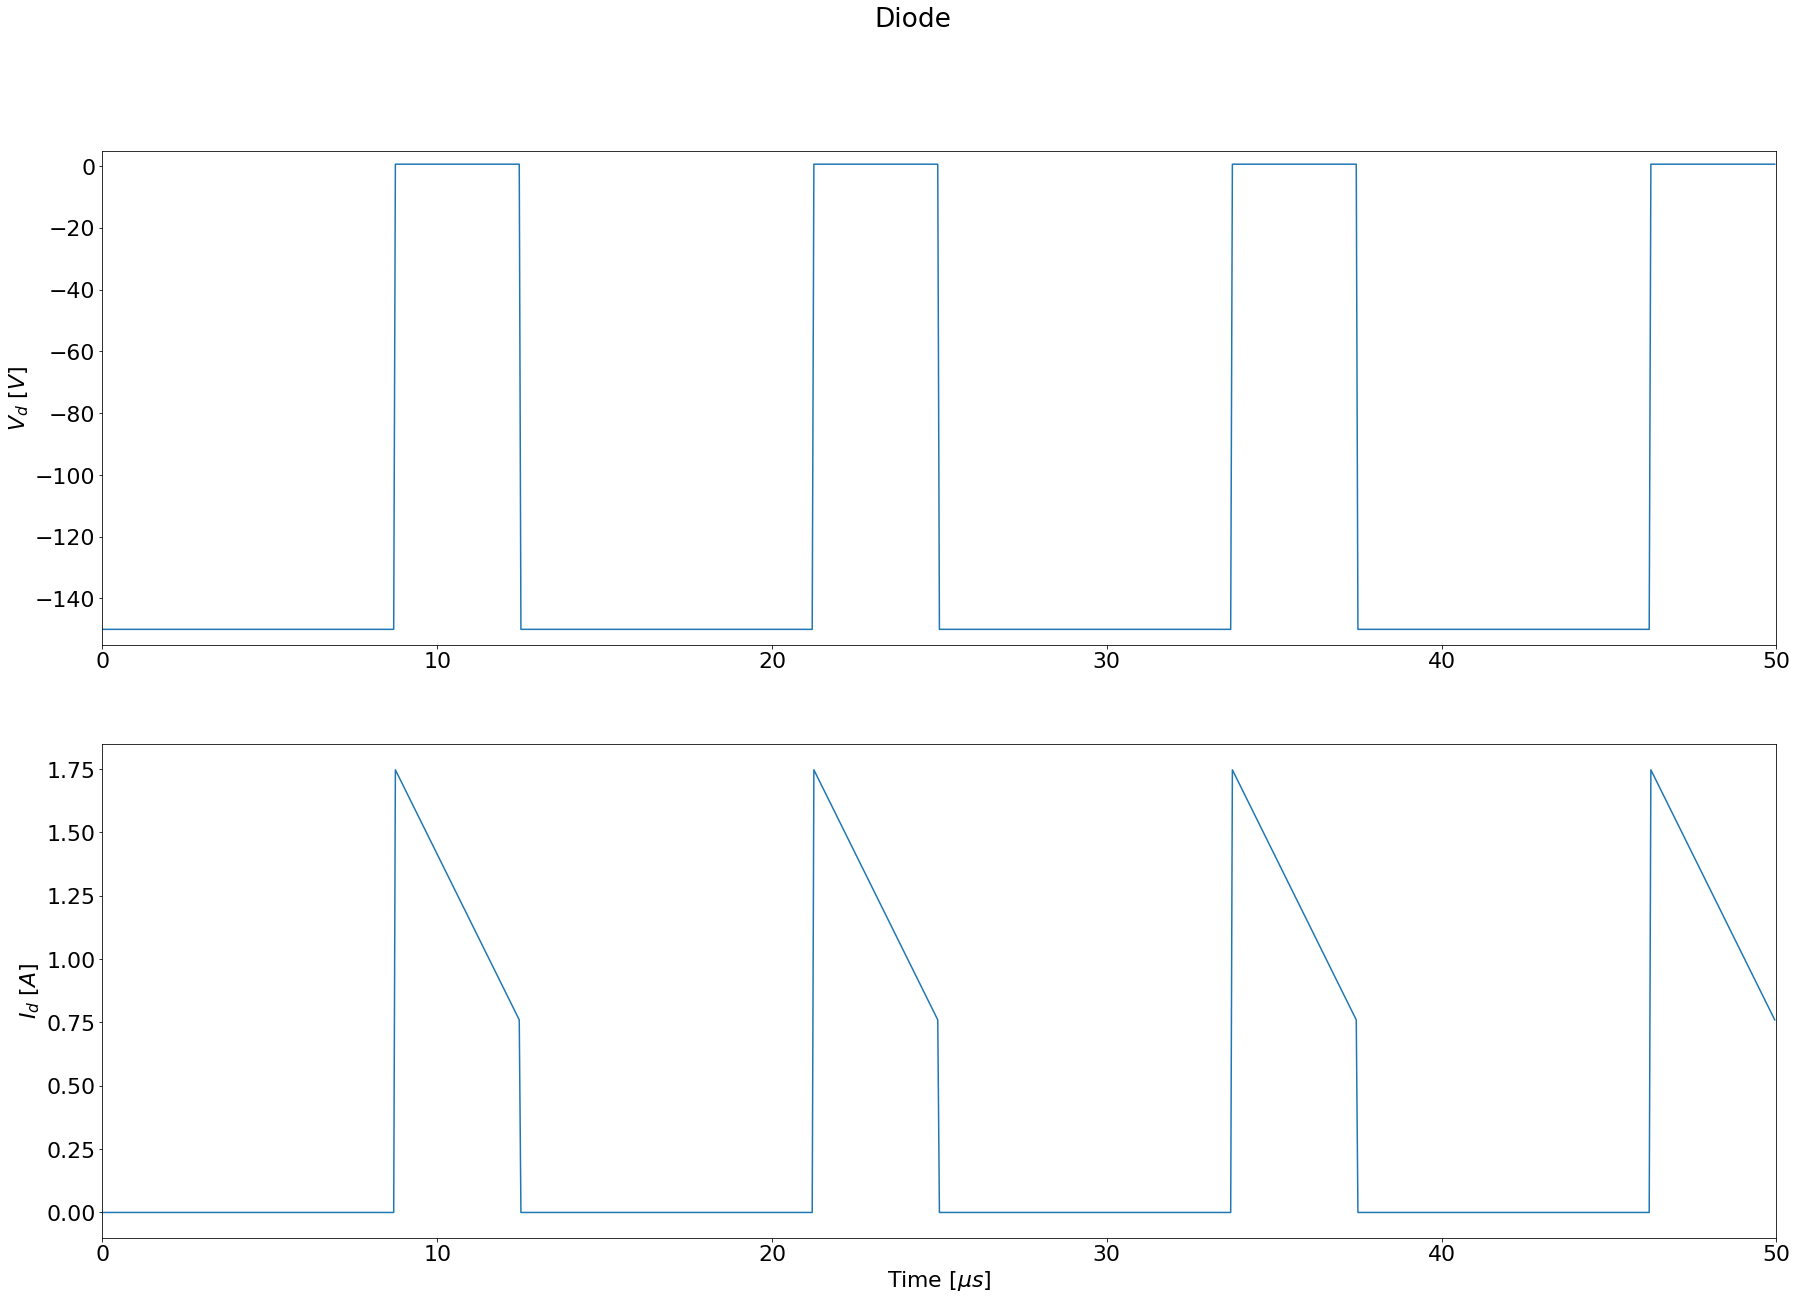

In [19]:
plt.figure(2)
plt.rcParams['figure.figsize'] = [30, 20]
plt.rcParams.update({'font.size': 22})
plt.subplot(211)
plt.plot(1e6 * X, V_d)
plt.xlim([0, N * 1e6 * Ts])
plt.ylim([-V_out + -5, 5])
# plt.xlabel('Time [$\mu s$]')
plt.ylabel('$V_{d}$ [$V$]')

plt.subplot(212)
plt.plot(1e6 * X, I_d)
plt.xlim([0, N * 1e6 * Ts])
plt.ylim([-0.1, (I_in + I_ripple) + 0.1])
plt.xlabel('Time [$\mu s$]')
plt.ylabel('$I_{d}$ [$A$]')
plt.suptitle('Diode')

### Capacitor
When S is closed $V_C=V_{out}$ and $I_C=-I_{out}$ <br />
When S is open $V_C=V_{out}$ and $I_C=I_{D}-I_{out}$ <br />


In [22]:
V_c = []
for i in range(N):
    Intermediate1 = np.array(np.ones(len(np.arange(0, D * Ts, N * Ts / S))) * V_out)
    V_c.extend(Intermediate1)
    Intermediate2 = np.array(np.ones(len(np.arange(Ts / S, (1 - D) * Ts, N * Ts / S))) * V_out)
    V_c.extend(Intermediate2)

I_c = []
for i in range(N):
    I_intermediate1 = np.array(-I_out - np.arange(0, D * Ts, N * Ts / S))
    I_c.extend(I_intermediate1)
    I_intermediate2 = np.array(-I_out + I_in + I_ripple - (np.arange(Ts / S, (1 - D) * Ts, N * Ts / S)) * 2 * I_ripple / ((1 - D) * Ts))
    I_c.extend(I_intermediate2)

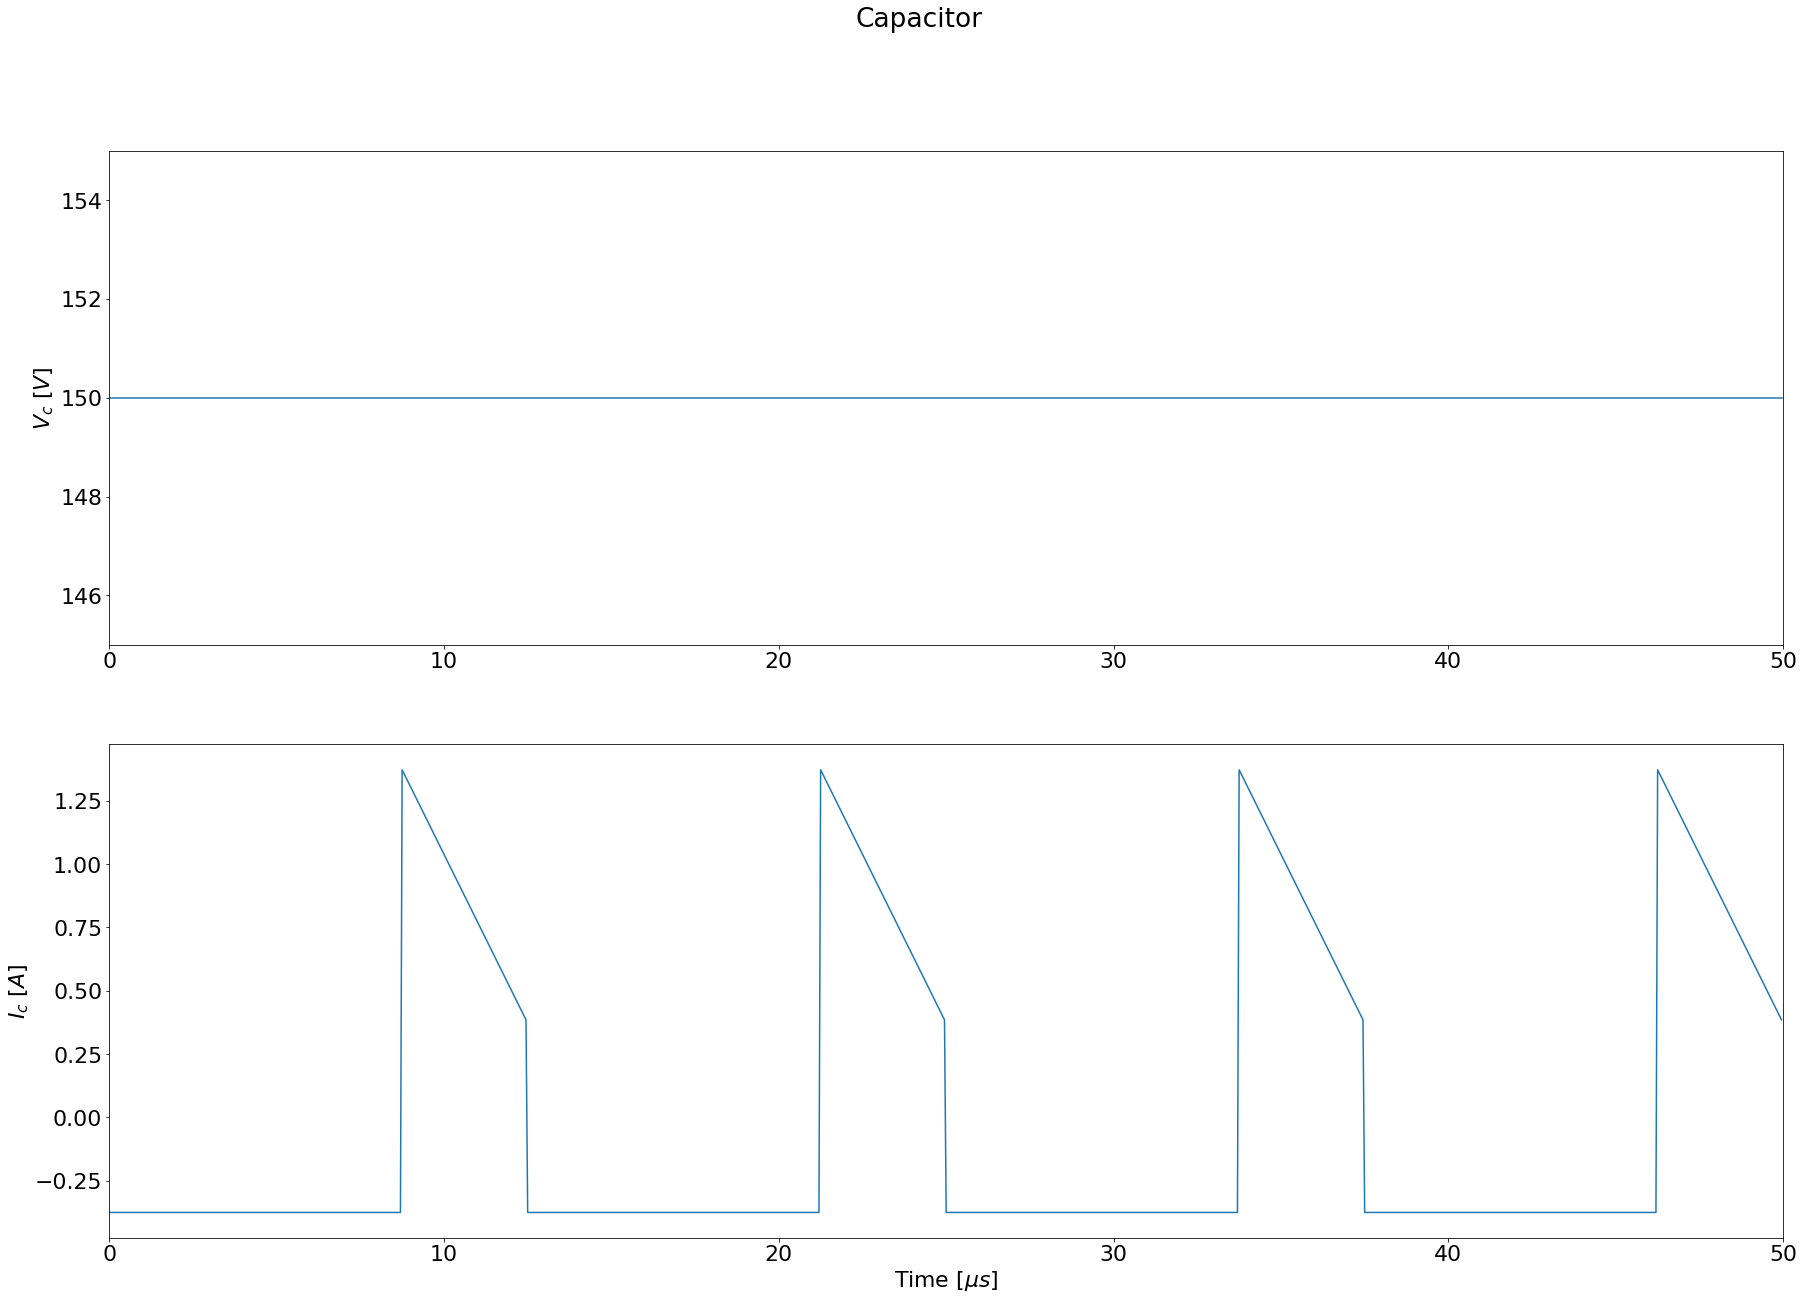

In [24]:
plt.figure(4)
plt.rcParams['figure.figsize'] = [30, 20]
plt.rcParams.update({'font.size': 22})
plt.subplot(211)
plt.plot(1e6 * X, V_c)
plt.xlim([0, N * 1e6 * Ts])
plt.ylim([V_out - 5, V_out + 5])
# plt.xlabel('Time [$\mu s$]')
plt.ylabel('$V_c$ [$V$]')

plt.subplot(212)
plt.plot(1e6 * X, I_c)
plt.xlim([0, N * 1e6 * Ts])
plt.ylim([-I_out - 0.1, (I_in + I_ripple - I_out) + 0.1])
plt.xlabel('Time [$\mu s$]')
plt.ylabel('$I_{c}$ [$A$]')
plt.suptitle('Capacitor')
plt.show()

## DCM

TODO Really don't wanna do it

# Generatal equations. 

## CCM-BCM
![](Images/CCM-BCM-Equations.jpg)
## DCM
![](Images/DCM-Equations.jpg)

# When can it enter DCM or CCM/BCM?

There are only 4 parameters that can change the Boost operation mode: inductor value, load resistance, switching frequency and duty cycle. This part show how each of them can effect this.

## Load resistor
Assuming everything else is the same increasing the load resistance can push the Boost converter to enter discontinuous mode. The relationship is that as load resistance increases the output current decreases, which means the average current of the inductor will decrease. The load resistance does not affect the ripple current, however, so if the average input current is less than the ripple current it will go to zero and stay zero till the inductor starts to charge again. The boundary condition is $I_{in}=\frac{\Delta I_L}{2}$. If $I_{in}>\frac{\Delta I_L}{2}=>\frac{V_{out}}{R}\cdot \frac{1}{1-d}>\frac{\Delta I_L}{2}$ then it is CCM, the other way around is DCM. So increasing R and keeping everything else the same pushes the boost converter more toward DCM

<p float="left">
  <img src="Images/CCM_DCM_R_Load_CCM_Mode.jpg" width=400 > 
  <img src="Images/CCM_DCM_R_Load_DCM_Mode.jpg" width=400 > 
</p>

## Inductance 
For inductance you are manipulating $\Delta I_L$, while keeping $I_{in}$ the same. 
This is due to the equation $\Delta I_L=\frac{V_{in}}{L}DT_{S}$
Changing $L$ doesn't effect $I_{in}$. 
So this time increasing the inductance can result in the boost converter going from CCM to DCM mode and decreasing it can mode the converter from DCM to CCM mode.

$L_{crit}=\frac{ V_{in}^2DR}{2f_{sw}V_{out}^2}$ this [video](https://www.youtube.com/watch?v=YIg7J3YjnbM&list=PLmK1EnKxphinxBub5hL0ZoJXWoqjkGE19&index=33&t=3) shows the entire derivation if you are interested


If $L>L_{crit}$ you are in CCM mode. <br />
If $L< L_{crit}$ you are in DCM mode.

## Switching frequency
From above $L_{crit}=\frac{ V_{in}^2DR}{2f_{sw}V_{out}^2}$. So decreasing $f_{sw}$ will cause $L_{crit}$ to increase 

## Duty cycle

<p float="left">
  <img src="Images/CCM_DCM_K_crit_graph.jpg" width=300 > 
  <img src="Images/CCM_DCM_operation_check.svg" width=700 > 
</p>
 

source left:https://ninova.itu.edu.tr/en/courses/institute-of-science-and-technology/132/elk-506e/ekkaynaklar?g45743 <br />
source right me [Code](Code)

Here $K_{crit}=D*(1-D)^2$ and $K=\frac{2Lf_{sw}}{R}$